## Word Count

### Word count on text file using PySpark

In [38]:
import re
from operator import add

% matplotlib inline
import matplotlib.pyplot as plt

In [39]:
# create function that generates a histogram
def histogram(words):
    count = map(lambda x: x[1], words)
    word = map(lambda x: x[0], words)
    plt.barh(range(len(count)), count,color = 'grey')
    plt.yticks(range(len(count)), word)

In [40]:
# read input file
file_in = sc.textFile('comphorror.txt')
print('Number of lines in file: %s' % file_in.count())

# add up lenths of each line
chars = file_in.map(lambda s: len(s)).reduce(add)
print('Number of characters in file: %s' % chars)

Number of lines in file: 3743
Number of characters in file: 157425


In [41]:
# Get words from the input file
words =file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))

# words of more than 3 characters
words = words.filter(lambda x: len(x) > 3)
words.first()

u'from'

In [42]:
# set count 1 per word
words = words.map(lambda w: (w,1))
words.first()

(u'from', 1)

In [43]:
# reduce phase - sum count all the words
words_count = words.reduceByKey(add)
words_count.first()

(u'magnetic', 5)

In [44]:
# create tuple (count, word) and sort in descending
words_count = words_count.map(lambda x: (x[1], x[0])).sortByKey(False)

# take top 20 words by frequency
words_count.take(20)

[(350, u'that'),
 (197, u'from'),
 (173, u'with'),
 (160, u'this'),
 (154, u'they'),
 (151, u'computer'),
 (125, u'were'),
 (122, u'when'),
 (107, u'date'),
 (107, u'subject'),
 (106, u'would'),
 (86, u'some'),
 (84, u'disk'),
 (83, u'there'),
 (83, u'system'),
 (82, u'machine'),
 (77, u'about'),
 (75, u'time'),
 (63, u'which'),
 (61, u'just')]

In [45]:
# Change order of tuple (word, count) from (count, word) 
words_count = words_count.map(lambda x:(x[1], x[0]))
words_count.take(20)

[(u'that', 350),
 (u'from', 197),
 (u'with', 173),
 (u'this', 160),
 (u'they', 154),
 (u'computer', 151),
 (u'were', 125),
 (u'when', 122),
 (u'date', 107),
 (u'subject', 107),
 (u'would', 106),
 (u'some', 86),
 (u'disk', 84),
 (u'there', 83),
 (u'system', 83),
 (u'machine', 82),
 (u'about', 77),
 (u'time', 75),
 (u'which', 63),
 (u'just', 61)]

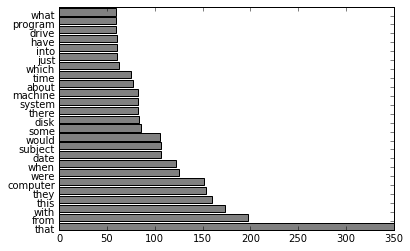

In [46]:
# display histogram
histogram(words_count.take(25))

In [47]:
# words in one summarised statement
words_count = sc.textFile('comphorror.txt') \
        .flatMap(lambda line: re.split('\W+', line.lower().strip())) \
        .filter(lambda x: len(x) > 3) \
        .map(lambda w: (w,1)) \
        .reduceByKey(add) \
        .map(lambda x: (x[1], x[0])).sortByKey(False)
words_count.take(20)

[(350, u'that'),
 (197, u'from'),
 (173, u'with'),
 (160, u'this'),
 (154, u'they'),
 (151, u'computer'),
 (125, u'were'),
 (122, u'when'),
 (107, u'date'),
 (107, u'subject'),
 (106, u'would'),
 (86, u'some'),
 (84, u'disk'),
 (83, u'there'),
 (83, u'system'),
 (82, u'machine'),
 (77, u'about'),
 (75, u'time'),
 (63, u'which'),
 (61, u'just')]